In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from __future__ import print_function

import scipy.io as sio
import numpy as np
import numpy.random as rng


In [2]:
pi = np.pi
n = 2000
N_s = n
N_t = n


angle_range_S = pi
radius_S = 0.5

gap = radius_S/2.
S_0_origin = [-gap, -gap/2]          #The origin of source domain with label = 0
S_1_origin = np.add(S_0_origin, [2*gap, gap])          #The origin of source domain with label = 1
S_0_start_ph = 0         #The start phase of data
S_1_start_ph = pi 
S_0_precision = 30.
S_1_precision = 30.

angle_range_T = angle_range_S 
radius_T = radius_S

T_0_origin = S_0_origin          #The origin of target domain with label = 0
T_1_origin = S_1_origin           #The origin of target domain with label = 1
T_0_start_ph = S_0_start_ph         #The start phase of data
T_1_start_ph = S_1_start_ph
T_0_precision = S_0_precision
T_1_precision = S_1_precision

T_rotate = pi / 8            #rotate source data with given angle to generate target data
rotate_precision = 2.

#---------------------------------------------------

S_0_phase = rng.uniform(low = S_0_start_ph, high = S_0_start_ph + angle_range_S, size = (N_s / 2, 1) )
S_0_radius = rng.normal(loc = radius_S, scale = radius_S/S_0_precision, size = (N_s / 2, 1))
S_1_phase = rng.uniform(low = S_1_start_ph, high = S_1_start_ph + angle_range_S, size = (N_s / 2, 1) )
S_1_radius = rng.normal(loc = radius_S, scale = radius_S/S_1_precision, size = (N_s / 2, 1))
S_0 = np.add(S_0_origin, S_0_radius * np.append(np.cos(S_0_phase), np.sin(S_0_phase), axis = 1))
S_1 = np.add(S_1_origin, S_1_radius * np.append(np.cos(S_1_phase), np.sin(S_1_phase), axis = 1))

#---------------------------------------------------

T_0_phase = rng.uniform(low = T_0_start_ph, high = T_0_start_ph + angle_range_T, size = (N_t / 2, 1) )
T_0_radius = rng.normal(loc = radius_T, scale = radius_T/T_0_precision, size = (N_t / 2, 1))
T_1_phase = rng.uniform(low = S_1_start_ph, high = T_1_start_ph + angle_range_S, size = (N_t / 2, 1) )
T_1_radius = rng.normal(loc = radius_T, scale = radius_T/T_1_precision, size = (N_t / 2, 1))
T_0 = np.add(T_0_origin, T_0_radius  * np.append(np.cos(T_0_phase), np.sin(T_0_phase), axis = 1))
T_1 = np.add(T_1_origin, T_1_radius  * np.append(np.cos(T_1_phase), np.sin(T_1_phase), axis = 1))


rotate_ph0 = rng.normal(loc = T_rotate, scale = T_rotate/rotate_precision, size = (N_t/2, 1))
for i in range(N_t/2):
    ph = rotate_ph0[i]
    Rotate_M = [[np.cos(ph), -np.sin(ph)],[np.sin(ph), np.cos(ph)]]
    T_0[i, :] = np.dot(T_0[i, :], np.transpose(Rotate_M))

rotate_ph1 = rng.normal(loc = T_rotate, scale = T_rotate/rotate_precision, size = (N_t/2, 1))
for i in range(N_t/2):
    ph = rotate_ph1[i]
    Rotate_M = [[np.cos(ph), -np.sin(ph)],[np.sin(ph), np.cos(ph)]]
    T_1[i, :] = np.dot(T_1[i, :], np.transpose(Rotate_M))


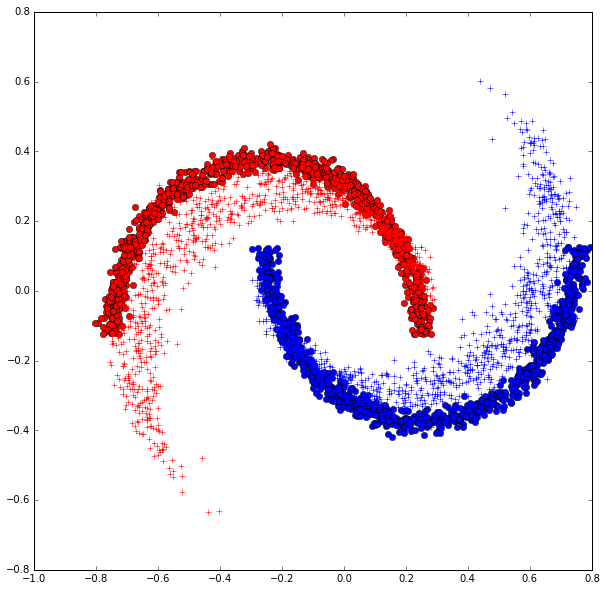

In [3]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(S_0[:,0], S_0[:,1], 'ro')
ax.plot(S_1[:,0], S_1[:,1], 'bo')
ax.plot(T_0[:,0], T_0[:,1], 'r+')
ax.plot(T_1[:,0], T_1[:,1], 'b+')
ax.plot(S_0_origin[0], S_0_origin[1], 'k+')
ax.plot(S_1_origin[0], S_1_origin[1], 'k+')
#plt.show()
plt.savefig('Twin_moon.png')

In [4]:
file_name = 'Twin_moon'

r_train = 0.5
r_validate = 0.3

S_train_n = np.floor(N_s * r_train).astype(int)
S_validataion_n = np.floor(N_s * r_validate).astype(int)
S_test_n = N_s - S_train_n - S_validataion_n

#---------------------------------------------------
n = S_test_n
ind = range(n/2)
test_S_fts=np.append(S_0[ind, :], S_1[ind, :], axis=0)
test_S_labels = np.zeros((n, 2))
test_S_labels[0:n/2, 0] = 1
test_S_labels[n/2:, 1] = 1
S_0 = np.delete(S_0, (ind), axis = 0)
S_1 = np.delete(S_1, (ind), axis = 0)

n = S_validataion_n
ind = range(n/2)
validataion_S_fts=np.append(S_0[ind, :], S_1[ind, :], axis=0)
validataion_S_labels = np.zeros((n, 2))
validataion_S_labels[0:n/2, 0] = 1
validataion_S_labels[n/2:, 1] = 1
S_0 = np.delete(S_0, (ind), axis = 0)
S_1 = np.delete(S_1, (ind), axis = 0)

n = S_train_n
S_fts = np.append(S_0, S_1, axis = 0)
S_labels = np.zeros((n, 2))
S_labels[0:n/2, 0] = 1
S_labels[n/2:, 1] = 1

index = np.random.permutation(n)
train_S_fts = S_fts[index, :]
train_S_labels  = S_labels[index, :]


#---------------------------------------------------

T_train_n = np.floor(N_t * r_train).astype(int)
T_validataion_n = np.floor(N_t * r_validate).astype(int)
T_test_n = N_t - T_train_n - T_validataion_n

n = T_test_n
ind = range(n/2)
test_T_fts=np.append(T_0[ind, :], T_1[ind, :], axis=0)
test_T_labels = np.zeros((n, 2))
test_T_labels[0:n/2, 0] = 1
test_T_labels[n/2:, 1] = 1
T_0 = np.delete(T_0, (ind), axis = 0)
T_1 = np.delete(T_1, (ind), axis = 0)

n = T_validataion_n
ind = range(n/2)
validataion_T_fts=np.append(T_0[ind, :], T_1[ind, :], axis=0)
validataion_T_labels = np.zeros((n, 2))
validataion_T_labels[0:n/2, 0] = 1
validataion_T_labels[n/2:, 1] = 1
T_0 = np.delete(T_0, (ind), axis = 0)
T_1 = np.delete(T_1, (ind), axis = 0)

n = T_train_n
T_fts = np.append(T_0, T_1, axis = 0)
T_labels = np.zeros((n, 2))
T_labels[0:n/2, 0] = 1
T_labels[n/2:, 1] = 1

index = np.random.permutation(n)
train_T_fts = T_fts[index, :]
train_T_labels  = T_labels[index, :]

#---------------------------------------------------

pkl = [(train_S_fts, train_S_labels), (validataion_S_fts, validataion_S_labels), (test_S_fts, test_S_labels), 
      (train_T_fts, train_T_labels), (validataion_T_fts, validataion_T_labels), (test_T_fts, test_T_labels)]
    
np.save(file_name, pkl)

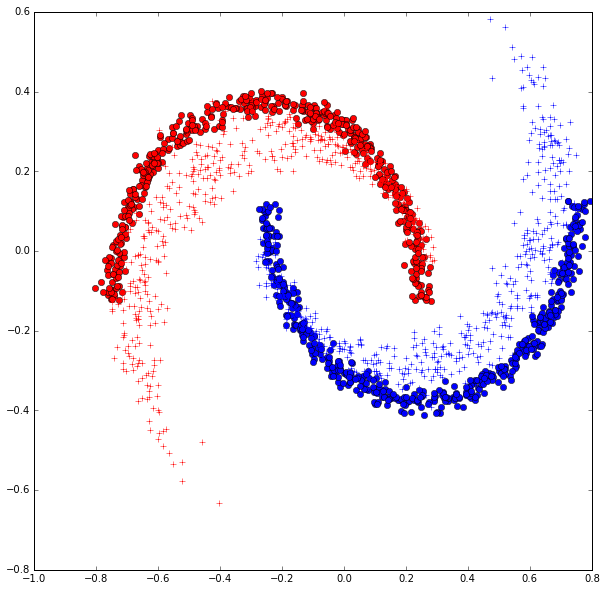

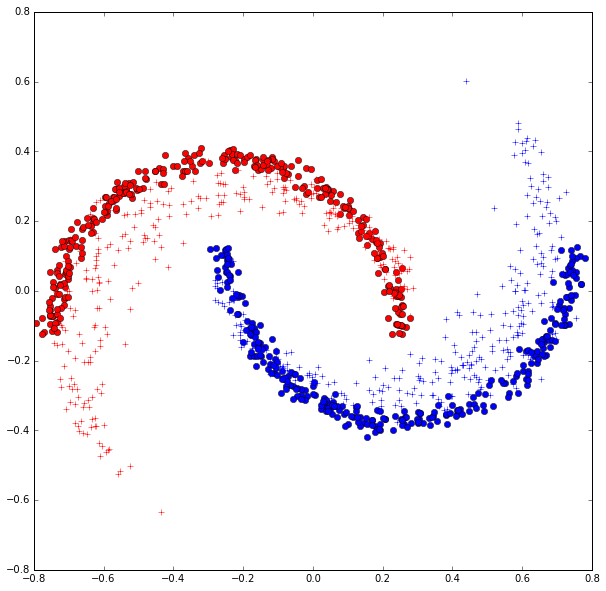

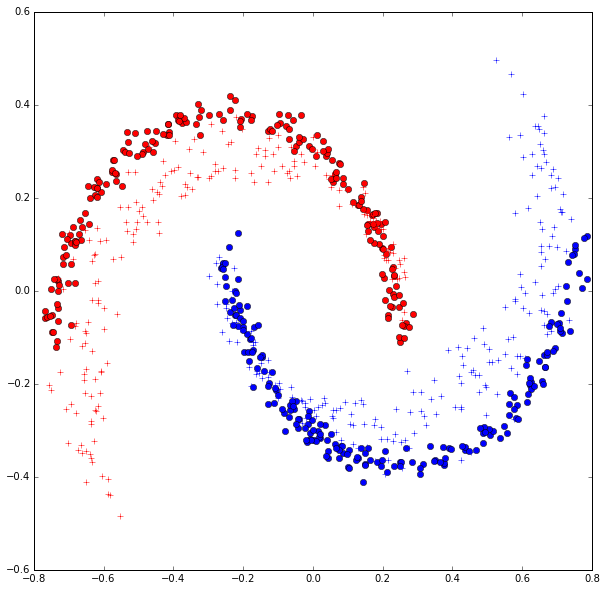

In [5]:
S_0 = train_S_fts[np.where(train_S_labels[:,0] == 1)]
S_1 = train_S_fts[np.where(train_S_labels[:,1] == 1)]
T_0 = train_T_fts[np.where(train_T_labels[:,0] == 1)]
T_1 = train_T_fts[np.where(train_T_labels[:,1] == 1)]

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(S_0[:,0], S_0[:,1], 'ro')
ax.plot(S_1[:,0], S_1[:,1], 'bo')
ax.plot(T_0[:,0], T_0[:,1], 'r+')
ax.plot(T_1[:,0], T_1[:,1], 'b+')
plt.show()

S_0 = validataion_S_fts[np.where(validataion_S_labels[:,0] == 1)]
S_1 = validataion_S_fts[np.where(validataion_S_labels[:,1] == 1)]
T_0 = validataion_T_fts[np.where(validataion_T_labels[:,0] == 1)]
T_1 = validataion_T_fts[np.where(validataion_T_labels[:,1] == 1)]

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(S_0[:,0], S_0[:,1], 'ro')
ax.plot(S_1[:,0], S_1[:,1], 'bo')
ax.plot(T_0[:,0], T_0[:,1], 'r+')
ax.plot(T_1[:,0], T_1[:,1], 'b+')
plt.show()

S_0 = test_S_fts[np.where(test_S_labels[:,0] == 1)]
S_1 = test_S_fts[np.where(test_S_labels[:,1] == 1)]
T_0 = test_T_fts[np.where(test_T_labels[:,0] == 1)]
T_1 = test_T_fts[np.where(test_T_labels[:,1] == 1)]

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(S_0[:,0], S_0[:,1], 'ro')
ax.plot(S_1[:,0], S_1[:,1], 'bo')
ax.plot(T_0[:,0], T_0[:,1], 'r+')
ax.plot(T_1[:,0], T_1[:,1], 'b+')
plt.show()

